# Machine Learning Overview
Machine learning is a science of getting computers to learn without being explicitly programmed. According to the Arthur Samuel (1959), it is the field that gives computers the ability to learn without being explicitly programmed (He wrote a checkers program and the computers had learned through its mistake to become a better player over time). 

The more opportunities you give a learning algorithm to learn, the better it becomes. 

Types of machine learning algorithms: 
- Supervised learning: has been used most widely in real-world applications
- Unsupervised learning
- Recommender systems
- Reinforcement learning

## Supervised Learning
99% of machine learning created today is called supervised learning

They are algorithm that learn to predict input vs output, or X to Y, mappings. You give it the correct answers (labels), and by seeing the inputs and outputs, it is able to look at unlabelled examples and predict the outputs (e.g., spam filtering, speech recognition, machine translation, online ads - will user click or not, self-driving cars - image detection, visual inspection - defects detection in manufacturing)

For example, want to predict the housing prices given the size of the house. Let's generate the data

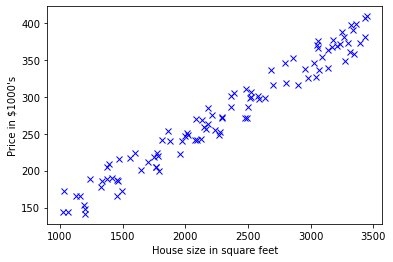

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# generate dataset for housing prices
def generate_housing_data(num_houses=100):
    np.random.seed(42)
    house_size = np.random.randint(low=1000, high=3500, size=num_houses)
    house_price = house_size * 100.0 + np.random.randint(low=20000, high=70000, size=num_houses)
    return np.column_stack((house_size, house_price))

data = generate_housing_data()
data[:,1] = data[:,1]/1000.0    # scale the price to $1000's

# plot the data
plt.plot(data[:,0], data[:,1], 'bx')
plt.ylabel("Price in $1000's")
plt.xlabel('House size in square feet')
plt.show()

From the figure above, we can fit a straight line to predict the price of the house given the size of the house. However, we can also fit more complex algorithms, such as quadratic function, cubic function, etc. In machine learning, we are finding the best function that will fit our data. This type of supervised learning is called *regression*, meaning we are trying to predict a continuous value (e.g., price of the house).

Another type of supervised learning is called classification. Let's take a look below

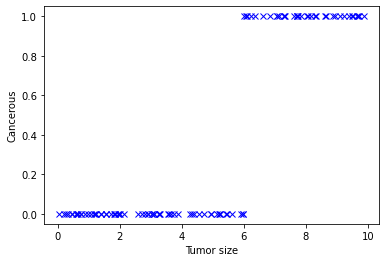

In [3]:
# generate breast cancer dataset given the size of the tumor
def generate_cancer_data(num_samples = 100):
    np.random.seed(42)
    tumor_size = np.random.rand(num_samples) * 10.0
    tumor_label = np.zeros(num_samples)
    for i in range(num_samples):
        if tumor_size[i] > 6.0:
            tumor_label[i] = 1
        else:
            tumor_label[i] = 0
    return np.column_stack((tumor_size, tumor_label))

breast = generate_cancer_data()
plt.plot(breast[:,0], breast[:,1], 'bx')
plt.ylabel("Cancerous")
plt.xlabel('Tumor size')
plt.show()

Our learning algorithm will try to predict whether the cell is malignant or benign. In this case, we are trying to predict a discrete value (e.g., malignant or benign), which makes it a classification problem. We can also have multiple classes to be predicted, such as *benign*, *malignant*, and *unknown*. Here we had only one input input value (size of the tumor), but we can have multiple input values (e.g., size of the tumor, age of the patient, etc.).

## Unsupervised Learning
After supervised learning, the most widely used machine learning algorithm is unsupervised learning. In unsupervised learning, we are not given any labels, and we are trying to find some structure in the data. For example, we are given the patient's age, size of the tumor but we are not given whether it is malignant or benign. The algorithms finds the data *structure/pattern* and groups the data into two different clusters (malignant and benign). This is called *clustering*.

Another type of unsupervised learnign is called *anomaly detection* to find unusual data points and *dimensionality reduction* to reduce the number of features in the data.

## Linear Regression
Linear regression is a supervised learning algorithm that tries to fit a straight line to the data to predict the output (a continuous number). 

Terminology:

- Train set: the data that we use to train the algorithm. We are given the input and output values.
- Features (x): the input values (e.g., size of the house)
- Labels (y): the output values, also called target variable (e.g., price of the house)

The single training example is defined as (x, y), where x is the input and y is the output. 

How does a supervised learning algorithm work: 
- Given a training set of features and labels, the algorithm **learns a function that maps the input to the output**. This is called a *hypothesis function*. The job of this function is to take the new input, $x$, and predict the output, $\hat{y}$ (the estimate of $y$). 

In algorithms, how are are going to represent the function, f? In linear regression, we are going to use a linear function, $f_{w,b}(x) = wx + b$. The values chosen for $w$ and $b$ are called the *parameters*, and according to these values, the function will be able to predict the output.

Let's come back to the housing prices example above. 

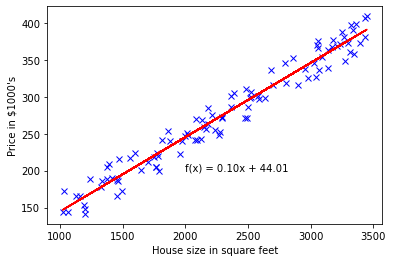

In [4]:
# plot the data
plt.plot(data[:,0], data[:,1], 'bx')
plt.ylabel("Price in $1000's")
plt.xlabel('House size in square feet')
# fit straight line to the data
x = data[:,0]
y = data[:,1]
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
plt.plot(x, m*x + c, 'r')
# label straight line
plt.text(2000, 200, 'f(x) = {0:.2f}x + {1:.2f}'.format(m, c))
plt.show()

Notice that we have fit a hypothesis linear function to the data. This is called a univariate linear regression because we used only one feature (size of the house). 

For any machine learning algorithm to work, a cost function has to be determined. This function tells us how good our hypothesis function is to predict the output. The goal of the algorithm is to minimize the cost function. Depending on the values chosen for the parameters/coefficients $w$ and $b$, the cost function will be different.

How do we find the best values for $w$ and $b$ so that the predicted value, $\hat{y}$, is as close as possible to the actual value, $y$? We can use the cost function to find the best values for $w$ and $b$. The cost function is defined as:

$$J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2$$

where $m$ is the number of training examples. The cost function is the sum of the squared errors. *The squared error* is the difference between the predicted value, $\hat{y}$, and the actual value, $y$. The squared error is squared so that the error is always positive. The cost function is divided by $2m$ so that the derivative of the cost function is easier to compute (i.e., we do not want the cost function to be bigger as the number of training examples increases). This is called the **squared error cost function** and it is the most common cost function used in linear regression.

To be more explicit the cost function is defined as:

$$J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} f_({w,b})x^{i} - y^{(i)})^2$$

where $x^{(i)}$ is the $i^{th}$ training example and $y^{(i)}$ is the $i^{th}$ training example label.

Recap: 
- Model: we wannt to fit a straight line to the data
- parameters: w, b: we want to find parameters w and b so that the line fits the data well
- cost function: used to measure how well the choice of w and b fits the data. linear regression finds the value of w and b, that minimizes the cost function (J(w,b))

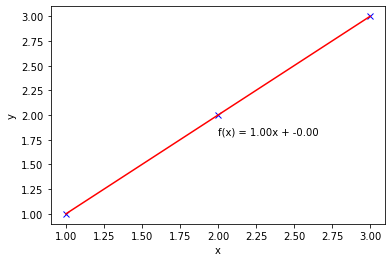

In [5]:
# generate data for three points linear regression (1,1), (2,2), (3,3)
def generate_3points_data():
    return np.array([[1,1], [2,2], [3,3]])

data = generate_3points_data()
plt.plot(data[:,0], data[:,1], 'bx')
plt.ylabel("y")
plt.xlabel('x')
# fit straight line to the data
x = data[:,0]
y = data[:,1]
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
plt.plot(x, m*x + c, 'r')
# label straight line
plt.text(2, 1.8, 'f(x) = {0:.2f}x + {1:.2f}'.format(m, c))
plt.show()



In this example, b=0 and w (slope) is 1. Let's find the cost function when w=1. For this dataset, the cost function will be 0 because for each value, x is always equal to y for each data point. 

choosing a value of w that causes the cost function to be the smallest seems like a good bet. therefore, in a general case for linear regression, it finds the parameters (w and b) that will give the smallest value possible of the cost function. 

recap: When the cost is relatively small, closer to zero, it means the model fits the data better compared to other choices for w and b.

If we have multiple parameters (more than 1), the cost function can be hard to visualize. However, we can use a contour plot to find the visualize the cost for each pair of w and b chosen. 

We want the code for an efficient algorithm that will compute the parameters that will minimize the cost function. This is because if we get to more complicated machine learning algorithms, it wouldn't be possible to compute these parameters by hand. This algorithm is called **gradient descent**. 

## Gradient Descent
Gradient descent is an algorithm that is used to minimize the cost function. 

This is not only used for regression problems, but also for other machine learning algorithms.

The algorithm is as follows: The algorithm starts with some initial values for the parameters, and then iteratively updates the parameters to minimize the cost function.

For example:
- start with some values of w and b (may be w=0 and b=0) as initial guess
- keep changing w and b to reduce J(w, b) according to the steepest descent
- repeat until we find the local minimum value of J(w, b)
- the value of J will change according to the value of initial w and b chosen and the J values from these scenarios are called *local minima*




w = w - alpha * dw/dw (partial derivative of J(w,b) with respect to w)

b = b - alpha * db/db (partial derivative of J(w,b) with respect to b)

where alpha is the learning rate. The learning rate is a hyperparameter that controls how big the steps are in the gradient descent algorithm. We repeat these steps until convergence (until we reach the local minima, so chaning the steps doesn't change the parameter that much). The parameters b and w are simulteneously and iteratively updated

The partial derivative of the cost function with respect to w is:

$$\frac{\partial J(w,b)}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})x^{(i)}$$

The partial derivative of the cost function with respect to b is:

$$\frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})$$




### Learning Rate
Too small of a learning rate will cause the gradient descent to be very slow. Too large of a learning rate will cause the gradient descent to overshoot the local minima and fail to converge. 

At the local minima, the partial derivative of the cost function with respect to the parameters is 0; therefore, the parameters will not change. As we approach the minimum, the partial derivative gets closer and closer to zero and update steps become smaller

## Gradient Descent for Linear Regression
The cost function for linear regression is a convex function. This means that the cost function is a bowl-shaped function. The gradient descent algorithm will always converge to the global minima. The global minima corresponds to the straight line that best fits the data

## Multiple Linear Regression

for multiple linear regression, we have more than one feature and the hypothesis function is:

$$\hat{y} or f_{(w,b)}(x) = w_1x_1 + w_2x_2 + ... + w_nx_n + b$$

where $x_1, x_2, ..., x_n$ are the features and $w_1, w_2, ..., w_n$ are the parameters of the model

It can simply be written as the dop product of the feature vector and the parameter vector:

$$\hat{y} = w^Tx + b$$

where $w$ is the parameter vector and $x$ is the feature vector. 

### Explaining the dop product
The dot product is the sum of the products of the corresponding elements of the two vectors.

Let u = (u1, u2, u3) and v = (v1, v2, v3) be two vectors of the same length n. The dot product of u and v is:

$$ |u-v|^2 = |u|^2 + |v|^2 - 2|u||v| \cos\theta$$ 

where $\theta$ is the angle between u and v. using the formula for the magnitude of a vector we can obtain: 

$$ (u_1 - v_1)^2 + (u_2 - v_2)^2 + (u_3 - v_3)^2 = (u_1^2 + u_2^2 + u_3^2) + (v_1^2 + v_2^2 + v_3^2) - 2 |u| |v| \cos\theta$$

simplifying yields: 

u_1v_1 + u_2v_2 + u_3v_3 = |u||v| \cos\theta

we therefore obtain the dop product, also called the inner product tobe the number $u . v$ given by:

$$u.v = u_1v_1 + u_2v_2 + u_3v_3$$

The dot product is a scalar quantity and is used in the linear regresson model and the regression can now be written as:

$$f_{w,b}(x) = w.x + b = w_1x_1 + w_2x_2 + ... + w_nx_n + b$$

where $w$ is the parameter vector and $x$ is the feature vector.


### Vectorization
Writing vectorized code is important because it makes the code more efficient (faster) and easier to read.


In [6]:
w = np.array([1, 2.5, -3.3])
b = 4
x = np.array([10, 20, 30])

## without vectorization
### possibility 1
f = w[0] * x[0] + w[1] * x[1] + w[2] * x[2] + b ## what if we had n = 100,000. this would be very inneficient

### possibility 2
n = 3
f = 0
for j in range(n):
    f = f + w[j] * x[j]

f = f + b       # this is more efficient that the first method but also not efficient since it doesn't use vectorization

## With vectorization 

f = np.dot(w, x) + b    
# this will run way much faster that then first two methods, especially when n is large
# This numpy function uses parallel hardware to efficiently calculate the dot product

For the for loop above, if j runs from 0 to 15, then the for loop will run 15 times. However, if we use vectorization, the dop product will be implemented in the computed hardware in only one step. The computer can get all the values of x and w at the same time and in a single step it multiplies all values of w and x with each other in parallel. After that, it adds all the values together. This is much faster than the for loop.